# Tonic
## 1. Loading events

In [5]:
%cd '../HOTS'
import tonic

transform = tonic.transforms.SpatialJitter(variance_x = 10, variance_y = 10)

testset = tonic.datasets.NMNIST(save_to='../Data',
                                train=False,
                                transform=None)

#testloader = tonic.datasets.DataLoader(testset, shuffle=True)

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data


In [6]:
testloader = tonic.datasets.DataLoader(testset, batch_size=32, shuffle=True)

In [7]:
events, target = next(iter(testloader))

RuntimeError: stack expects each tensor to be equal size, but got [2215, 4] at entry 0 and [3759, 4] at entry 1

In [27]:
print(testset.ordering)

xytp


In [32]:
events, target = next(iter(testloader))
print("{} event stream for target {}".format(events.shape, target.item()))

torch.Size([1, 1266, 4]) event stream for target 5


In [63]:
events, target = next(iter(testloader))
print(min(events[0,:,testset.ordering.find("x")]).item())
print(max(events[0,:,testset.ordering.find("x")]).item())

5
31


In [10]:
t_train = []
t_train.append(events[0,:,0])
print(t_train[0])

NameError: name 'events' is not defined

## 2. Using them as input of our network

In [13]:
from TimeSurface import TimeSurface

target_event = 2000
SpTe = TimeSurface(R=2,tau=200000,camsize=[34,34])
i = 0
while i<target_event:
    TS, activ = SpTe.addevent(events[0][i][0],events[0][i][1],events[0][i][2], events[0][i][3])
    i+=1
    
SpTe.plote()

SpTe.plot3D()

TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'int'

## 3. Transforms
### 3.1. Denoise

Cycles through all events and drops it if there is no other event within a time of time_filter and a spatial neighbourhood of 1.

In [11]:
import tonic.transforms as transforms
transform = transforms.Compose([transforms.Denoise(time_filter=1000)])

testset = tonic.datasets.NMNIST(save_to='../Data',
                                train=False,
                                transform=transform)

testloader = tonic.datasets.DataLoader(testset, shuffle=False)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data


In [14]:
from TimeSurface import TimeSurface
events, target = next(iter(testloader))
print("{} event stream for target {}".format(events.shape, target))

target_event = 2000
SpTe = TimeSurface(R=2,tau=200000,camsize=[34,34])
i = 0
while i<target_event:
    TS, activ = SpTe.addevent(events[0][i][0],events[0][i][1],events[0][i][2], events[0][i][3])
    i+=1
    
SpTe.plote()

SpTe.plot3D()

torch.Size([1, 2508, 4]) event stream for target tensor([0])


TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'int'

### 3.2 Make Time Surfaces

In [92]:
transform = transforms.Compose([transforms.Denoise(time_filter=10000),
                                transforms.ToTimesurface(surface_dimensions=(5,5), tau=5e3),])

testset = tonic.datasets.NMNIST(save_to='../Data',
                                train=False,
                                transform=transform)

Using downloaded and verified file: ./data/nmnist_test.zip
Extracting ./data/nmnist_test.zip to ./data


In [93]:
testloader = tonic.datasets.DataLoader(testset, shuffle=False)
events, target = next(iter(testloader))
print(events.shape, target)

torch.Size([1, 5410, 2, 5, 5]) tensor([0])


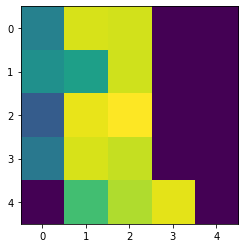

In [94]:
plt.imshow(events[0][1000][1][:][:])

### 3.3 Other transforms

#### On events:
- Crop
- DropEvents
- FlipLR
- FlipPolarity
- SpatialJitter
- TimeJitter
- UniformNoise

#### Event representations:
- ToAveragedTimesurface
- ToSparseTensor
- ToRateCodedFrame

#### Target tranforms:
- ToOneHotEncoding
- Repeat


## 2. Loading Batch

In [14]:
testset = tonic.datasets.NMNIST(save_to='../Data', train=False)

testloader = tonic.datasets.DataLoader(testset,
                                       #batch_size=15,
                                       #collate_fn=tonic.utils.pad_events,
                                       shuffle=True)

events, target = next(iter(testloader))
print(events.shape, target)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data
torch.Size([1, 5534, 4]) tensor([3])


In [16]:
events, target = next(iter(testloader))
print(events.shape, target)

torch.Size([1, 2858, 4]) tensor([9])


## Datasets used:

- DVS GESTURE: https://research.ibm.com/dvsgesture/
- N-CALTECH 101: https://www.garrickorchard.com/datasets/n-caltech101
- N-CARS: https://www.prophesee.ai/dataset-n-cars-download/
- N-MNIST: https://www.garrickorchard.com/datasets/n-mnist
- POKER DVS: http://www2.imse-cnm.csic.es/caviar/POKERDVS.html